<a href="https://colab.research.google.com/github/srujandk/Guvi-Final-PJ-CCP/blob/main/Project_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.


# **Features:**

*   age (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this client
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
*   Output variable (desired target): y - has the client subscribed to the insurance?

# **Minimum Requirements:**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price.

AUROC must be used as a metric to evaluate the performance of the models












i. This problem is a Supervised Learning, Classification Problem

ii. The target variable here is 'y'



In [ ]:
#Program Initiation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 1) Import the Dataset
df=pd.read_csv("/content/Customer_conversion_dataset.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df['y']=df['y'].map({'yes':1, 'no':0})

In [ ]:
df.shape

(45211, 11)

## **CLEANING THE DATA**
To clean the data i'm going to do 4 steps:

  1. Missing values(data) and checking duplicate data
  2. Spelling correction
  3. Data format check (datatype)
  4. Outlier check

In [ ]:
# Step 1 : To check if there are any missing values

df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
# Step 2 : To check and eliminate duplicates

df = df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

6 duplicates are eliminated from the dataset(df)

In [ ]:
# Step 3 : To check if data is in right format

df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

Dataset is in the right format so no change is required.

Step 4 : To check if it is a structured dataset.

The dataset is already present in rows and columns format hence it is a structured dataset.

In [ ]:
# Step 5 : To check if there are any outliers present.

df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


# AGE:

In [ ]:
df.age.quantile(0.75)

48.0

In [ ]:
df.age.quantile(0.25)

33.0

In [ ]:
iqr = df.age.quantile(0.75) - df.age.quantile(0.25)
upper_threshold = df.age.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

70.5

In [ ]:
lower_threshold = df.age.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

25.5

# Day:

In [ ]:
df.day.quantile(0.75)

21.0

In [ ]:
df.day.quantile(0.25)

8.0

In [ ]:
iqr = df.day.quantile(0.75) - df.day.quantile(0.25)
upper_threshold = df.day.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

40.5

In [ ]:
lower_threshold = df.day.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

1.5

# Dur:

In [ ]:
df.dur.quantile(0.75)

319.0

In [ ]:
df.dur.quantile(0.25)

103.0

In [ ]:
iqr = df.dur.quantile(0.75) - df.dur.quantile(0.25)
upper_threshold = df.dur.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

643.0

In [ ]:
lower_threshold = df.dur.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

-5.0

# Num_Calls:

In [ ]:
df.num_calls.quantile(0.75)

3.0

In [ ]:
df.num_calls.quantile(0.25)

1.0

In [ ]:
iqr = df.num_calls.quantile(0.75) - df.num_calls.quantile(0.25)
upper_threshold = df.num_calls.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

6.0

In [ ]:
lower_threshold = df.num_calls.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

0.0

# EDA :
EDA helps us to analyse data visually and to understand important features that might have an impact in drawing conclusions.

# Age & Day :

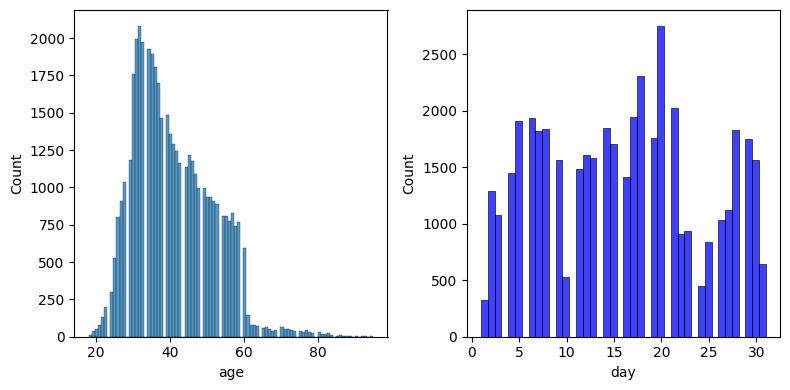

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df.age)
plt.subplot(1,2,2)
sns.histplot(df.day,color = 'blue')
plt.tight_layout()

DISTRIBUTION OF FEATURES

- The AGE is distributed between 18 to 95. However, the more active people in buying insurance is between age 25 to 55.

- The DAY are distributed between 1 to 31.

# Dur & Num_Calls :

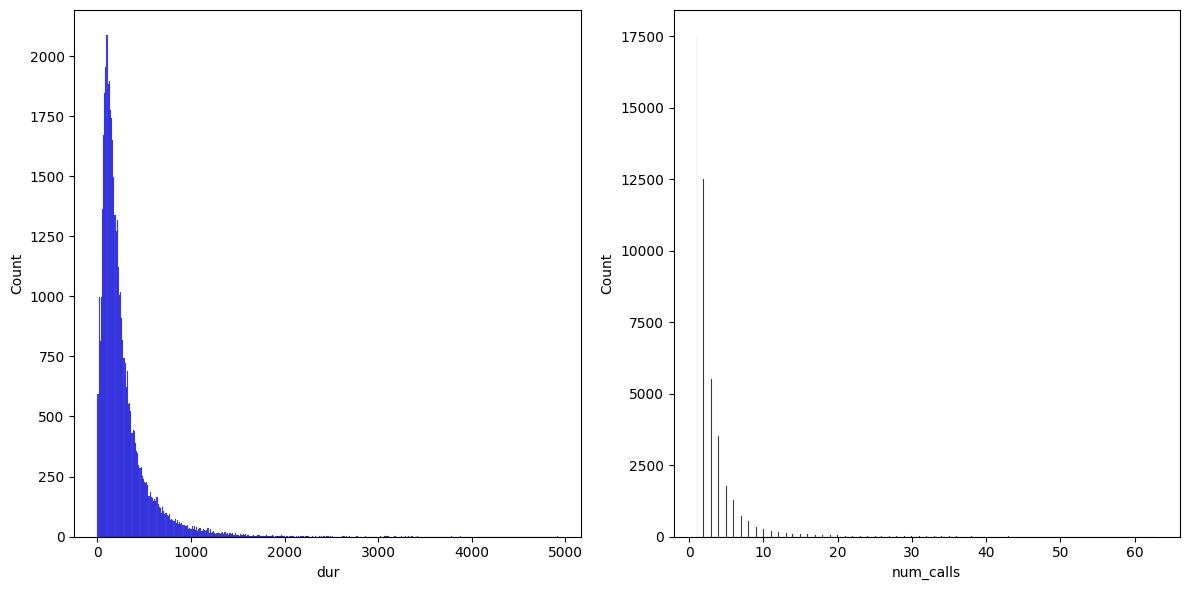

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df.dur,color = 'blue')
plt.subplot(1,2,2)
sns.histplot(df.num_calls,color = 'black')
plt.tight_layout()

- The DUR is distributed between 0 to 2000. Most repated dur of calls is between 0 to 500 seconds.

- The NUM_CALLS is distributed between 1 t0 20 and most repated no. of calls are between 1 to 5.

#Percentage Distribution for job, marital, education_qual, call_type, mon, prev_outcomes

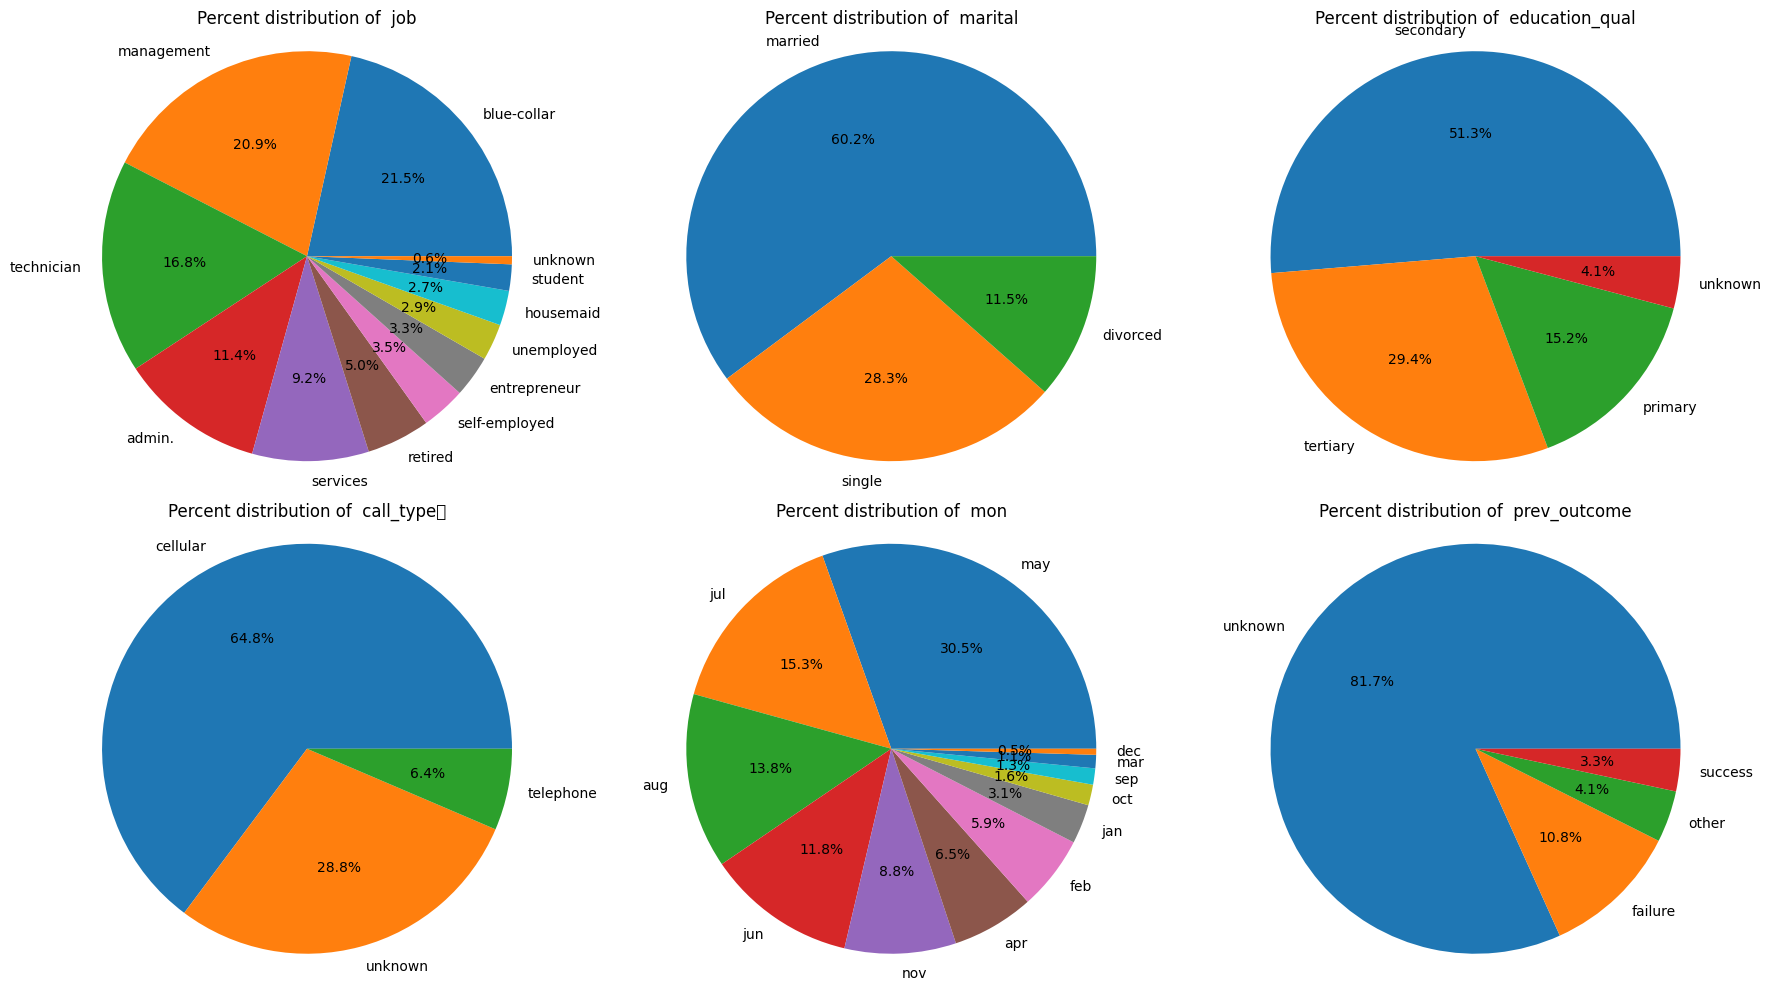

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(231)
df_source = df.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')

plt.subplot(232)
df_source = df.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')

plt.subplot(233)
df_source = df.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')

plt.subplot(234)
df_source = df.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')

plt.subplot(235)
df_source = df.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')

plt.subplot(236)
df_source = df.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')

plt.tight_layout()
plt.show()

Observation :
1. Job : There are a higher percentage of blue-collar and unknown to be in the least percentage.
2. Marital Status :  There are a higher percentage of married customers than single & divorced.
3. Educational Qualification : There are a higher percentage of Secondary education and least of unknown.
4. Call_type : Higher number of calls were executed by cellular device and least by telephone.
5. Month : Highest number of calls were done in the month of May and least in December.
6. Previous_Outcomes : Unknown outcomes are higher than others.


# All Continuous Features Plots for our overview



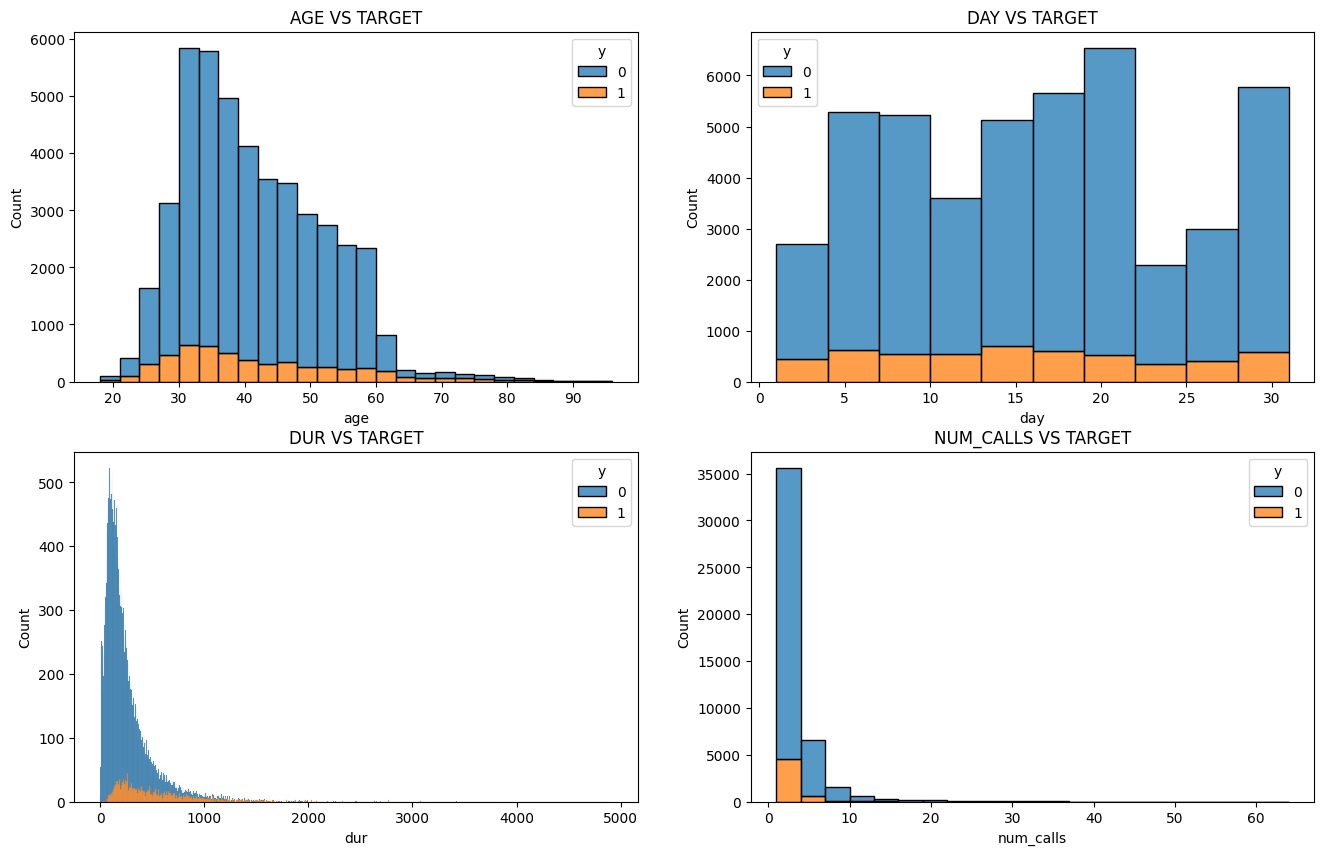

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.histplot(data=df, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.subplot(222)
sns.histplot(data=df, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.subplot(223)
sns.histplot(data=df, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')

plt.subplot(224)
sns.histplot(data=df, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

To be reviewed

#FEATURES VS TARGET PLOTS TOGETHER

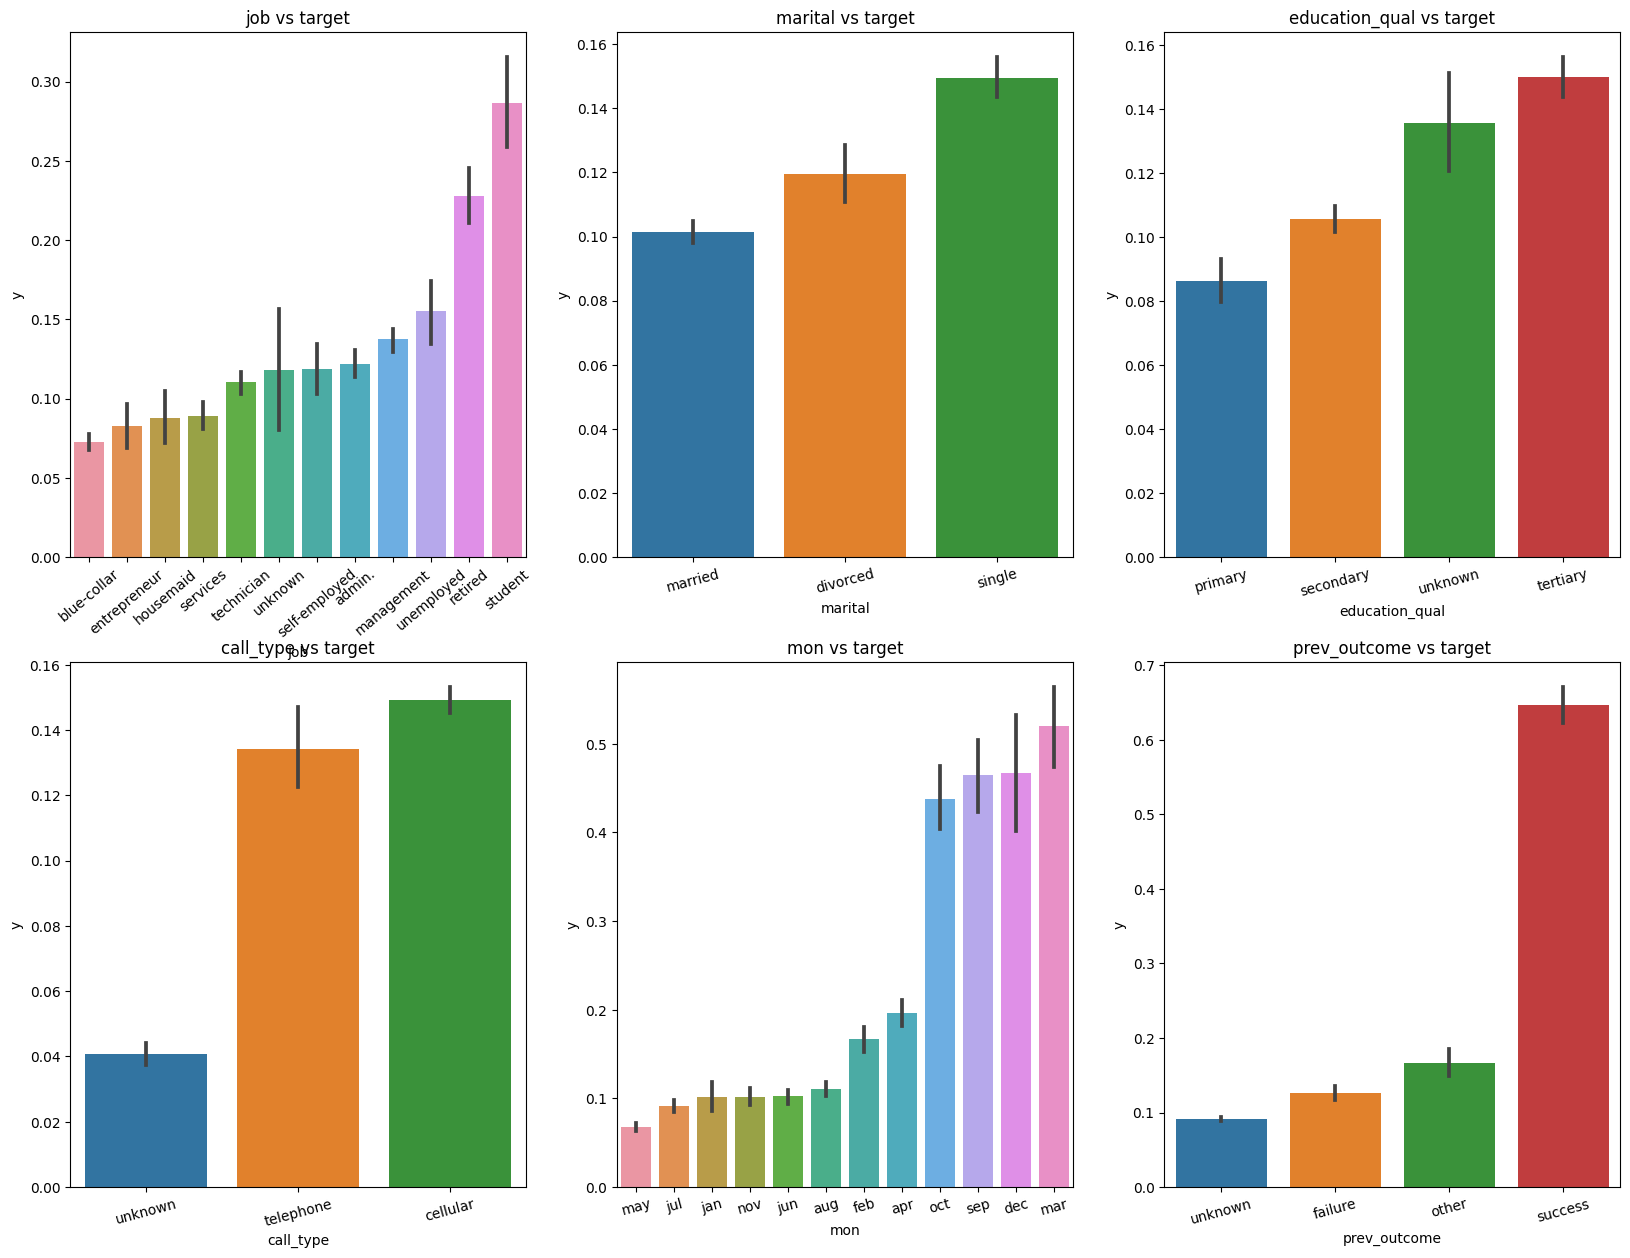

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=df,order=df.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=40)
plt.title('job vs target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=df,order=df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=df,order=df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=df,order=df.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=df,order=df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=df,order=df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')

plt.show()
plt.tight_layout()

Observation :
1. Job : Students are are interested more to subscribe  than other groups.
2. Marital Status : Single customers are interested more to subscribe than other groups.
3. Educational Qualification : Tertiary customers are interested more to subscribe than other groups.
4. Call_Type : Most calls are executed by cellular device than other means.
5. Month : March and December are the months were higher number of subscriptions are done respectively.
6. Previous_Outcomes :  Success group of customers are more interested to subscribe than other groups.


#Feature Analysis

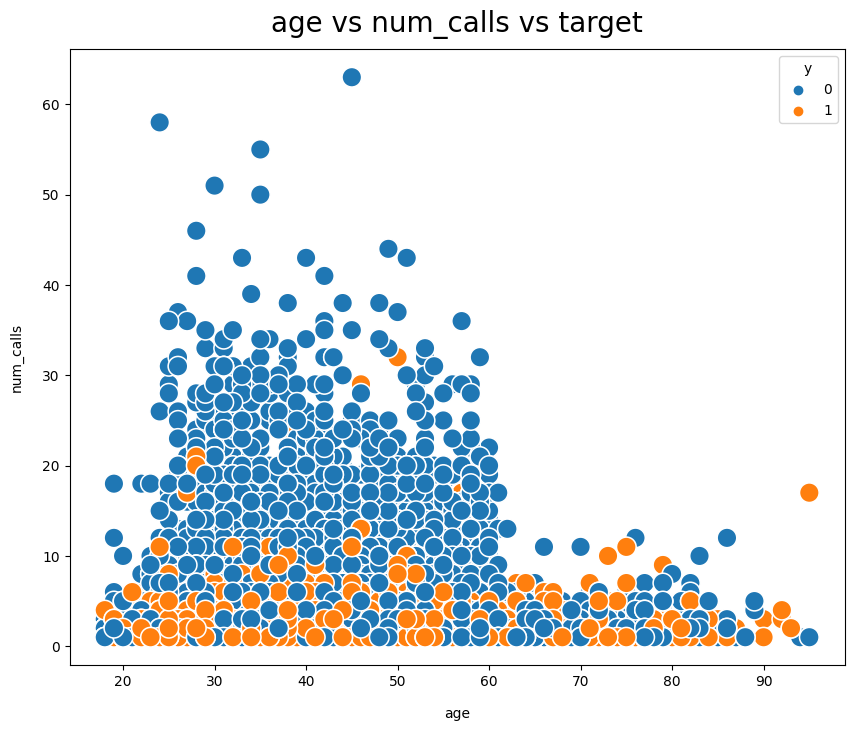

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='num_calls', hue='y', data=df, s=200)
plt.title("age vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

Observation : Customers within the Age group 25 to 55 have received more num of calls.

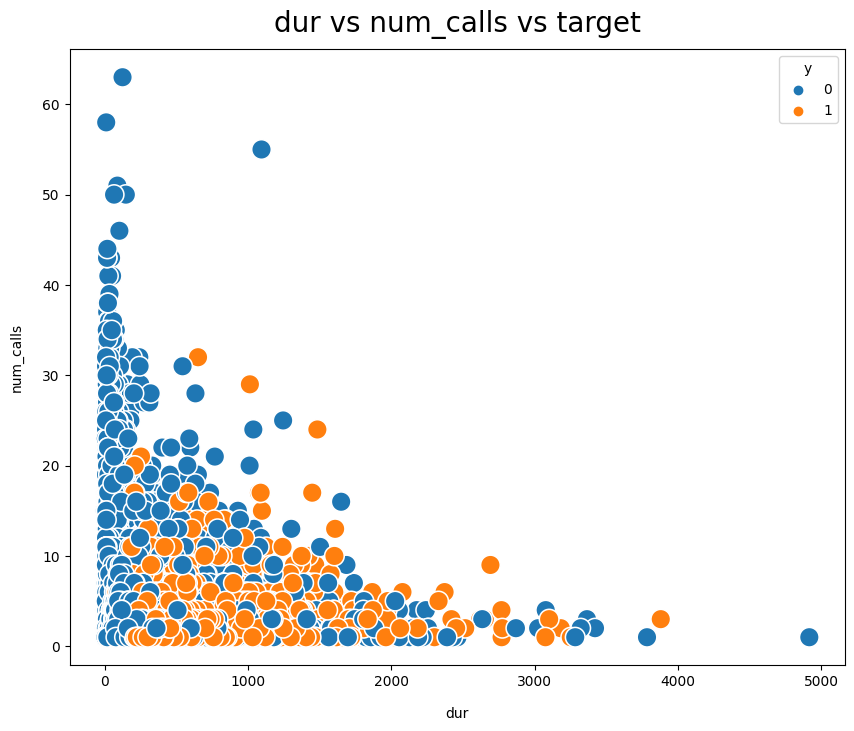

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dur', y='num_calls', hue='y', data=df, s=200)
plt.title("dur vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("dur", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

Observation :

Customers with least duration of calls, are been called more number of times.

Customers with a better duration of calls, have good chances have insurance been subscribed.

FROM EDA,

The 3 feature importance in our point of view:

- Number calls they made
- Duration of the call they spend
- Maritial status

#Encode the Data

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

**Label Encoding**

In [ ]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

**One-Hot Encoding**

In [ ]:
df= pd.get_dummies(df, columns=["marital",'prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


Encoding is complete

In [ ]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


#**Target and Feature Selection**

In [ ]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = df['y'].values

Observation: We have selected our features and the target variable

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

#**Splitting**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

The data is split into two parts.
1. Train Data
2. Test Data

#**Random Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #  import
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr1 = LogisticRegression()
lr1.fit(X_rus,y_rus)
lr1.score(X_rus,y_rus)

0.8056478405315615

#**Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.8064788732394366

#**SMOTE:**

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.8472143974960876

In [ ]:
 !pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

#SMOTE+ENN :

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [ ]:
import collections, numpy
counter = collections.Counter(y_smt)
counter

Counter({0: 23397, 1: 30481})

#To balance the data:
For Random under sampling , the model score is 80.20%
For Random over sampling , the model score is 80.66%
SMOTE, the model score is 84.63%
SMOTE + Tomek, the model score is 92.2%.
Here we got the best score from SMOTE+Tomek which is 92.2%.

Now, We will use SMOTE+Tomek technique to build the models.

#1. Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)
print( "AUROC on the sampled dataset : ", roc_auc_score( y_test, lr.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.8824874320513344


In [ ]:
lr.predict_proba(X_test)

array([[0.32350188, 0.67649812],
       [0.8453733 , 0.1546267 ],
       [0.42392357, 0.57607643],
       ...,
       [0.92421942, 0.07578058],
       [0.95899141, 0.04100859],
       [0.87071744, 0.12928256]])

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt

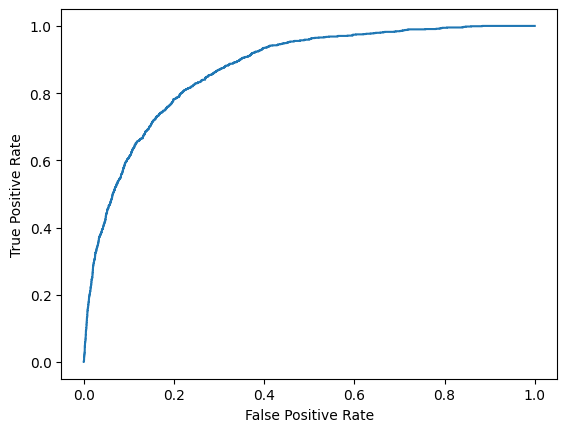

In [ ]:
#define metrics
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2. Decision Tree :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(X_smt,y_smt)
print(dt.score(X_smt,y_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7805244381645248


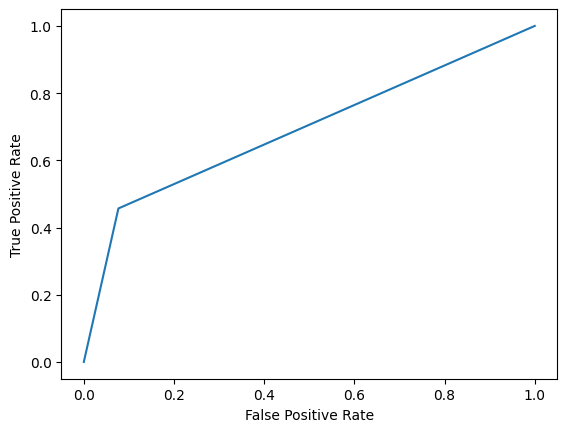

In [ ]:
#define metrics
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_proba = decision_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7835480158877464  Cross val score :  0.8810972717938688
Depth  :  2  Training Accuracy :  0.8014774119306581  Cross val score :  0.8904999266611254
Depth  :  3  Training Accuracy :  0.8651026392961877  Cross val score :  0.8949240942649
Depth  :  4  Training Accuracy :  0.9072348639518913  Cross val score :  0.8994588813377012
Depth  :  5  Training Accuracy :  0.9127658784661643  Cross val score :  0.8958097834058574
Depth  :  6  Training Accuracy :  0.9248301718697799  Cross val score :  0.8953670610668361
Depth  :  7  Training Accuracy :  0.9360963658636178  Cross val score :  0.891938346452843
Depth  :  8  Training Accuracy :  0.9423141170793273  Cross val score :  0.8926023077299174
Depth  :  9  Training Accuracy :  0.9508890456215895  Cross val score :  0.8913854935706252
Depth  :  10  Training Accuracy :  0.9568655109692268  Cross val score :  0.8911632767809123
Depth  :  20  Training Accuracy :  0.9995545491666358  Cross val score :  0.8698170

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_smt,y_smt)
print(dt.score(X_smt,y_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

0.9072348639518913
AUROC on the sampled dataset :  0.8689404971127291


# 3. K-Nearest Neighbour :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt)
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.8534458270180414
K value : 2 Cross Value Accuracy : 0.8794382242213856
K value : 3 Cross Value Accuracy : 0.8783336185400674
K value : 4 Cross Value Accuracy : 0.8843059697843836
K value : 5 Cross Value Accuracy : 0.8844168337163252
K value : 6 Cross Value Accuracy : 0.885190681073681
K value : 7 Cross Value Accuracy : 0.8850803060675695
K value : 8 Cross Value Accuracy : 0.8853011783112501
K value : 9 Cross Value Accuracy : 0.8850803060675696
K value : 10 Cross Value Accuracy : 0.8854117977802767
K value : 20 Cross Value Accuracy : 0.8849696865985429
K value : 30 Cross Value Accuracy : 0.8843056030900112
K value : 40 Cross Value Accuracy : 0.8840842419205007
K value : 50 Cross Value Accuracy : 0.8833100278687723


In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.9140465496120865
AUROC on the sampled dataset :  0.8458989659541423


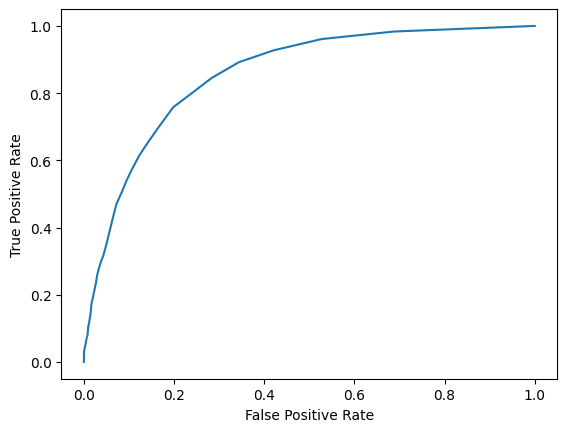

In [ ]:
#define metrics
knn = KNeighborsClassifier(i)
knn.fit(X_train,y_train)
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4. XG_Boost :

In [ ]:
import xgboost as xgb

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9005655649537964
Learning rate :  0.02  Cross-Val score :  0.8989062729183983
Learning rate :  0.03  Cross-Val score :  0.9006760621913656
Learning rate :  0.04  Cross-Val score :  0.9000125898401213
Learning rate :  0.05  Cross-Val score :  0.8987967535324891
Learning rate :  0.1  Cross-Val score :  0.8992384980198505
Learning rate :  0.11  Cross-Val score :  0.8991282452451964
Learning rate :  0.12  Cross-Val score :  0.8989066396127707
Learning rate :  0.13  Cross-Val score :  0.8976903143793086
Learning rate :  0.14  Cross-Val score :  0.8980215616291009
Learning rate :  0.15  Cross-Val score :  0.8978004449225052
Learning rate :  0.2  Cross-Val score :  0.9022243680633648
Learning rate :  0.5  Cross-Val score :  0.8937072801056081
Learning rate :  0.7  Cross-Val score :  0.8935973940253265
Learning rate :  1  Cross-Val score :  0.8904995599667529


In [ ]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [49,  4,  1, ...,  0,  0,  0],
       [26,  3,  1, ...,  0,  0,  1],
       [54,  7,  1, ...,  0,  0,  0]])

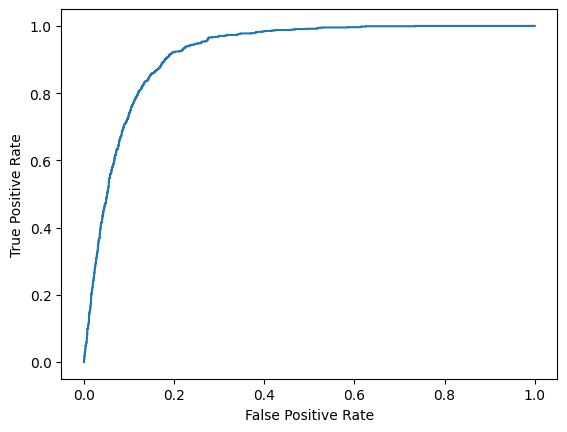

In [ ]:
#define metrics
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0)
model.fit(X_smt,y_smt)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_smt, y_smt)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

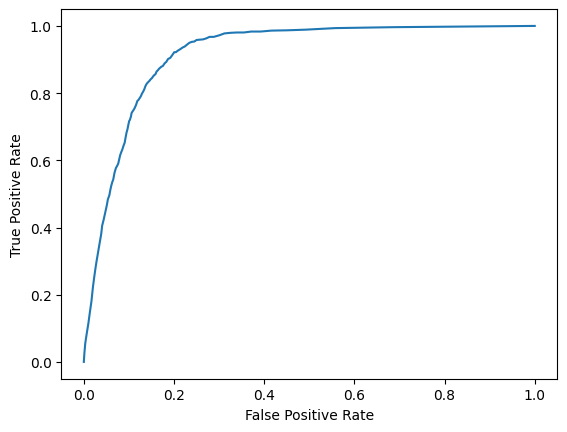

In [ ]:
#define metrics
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_smt, y_smt)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_smt, y_smt)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.9152433306669625


# Feature importance from all Models :

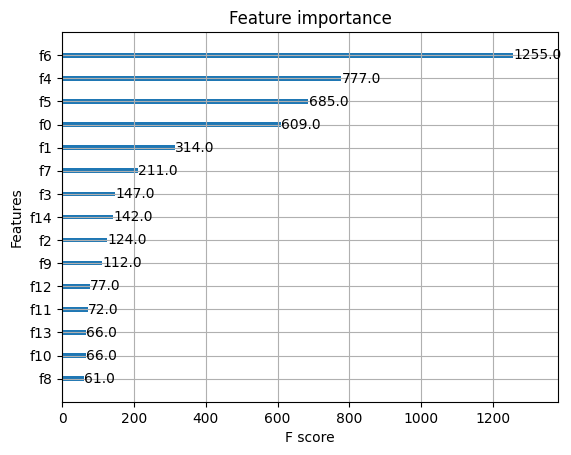

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
importance = dt.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.003247251665210418, 'age'),
 (0.0, 'job'),
 (0.0, 'education_qual'),
 (0.0, 'call_type'),
 (0.0, 'day'),
 (0.08478824941882666, 'mon'),
 (0.5472587616499915, 'dur'),
 (0.0, 'num_calls'),
 (0.0, 'marital_divorced'),
 (0.0, 'marital_married'),
 (0.0, 'marital_single'),
 (0.10214181809858816, 'prev_outcome_failure'),
 (0.04388507714268533, 'prev_outcome_other'),
 (0.0, 'prev_outcome_success'),
 (0.218678842024698, 'prev_outcome_unknown')]

In [ ]:
importance = classifier.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.06417167988815532, 'age'),
 (0.0398406079033127, 'job'),
 (0.01760228690068848, 'education_qual'),
 (0.0389589950796209, 'call_type'),
 (0.05863924008549657, 'day'),
 (0.09348765178713171, 'mon'),
 (0.3917978965666785, 'dur'),
 (0.040484186770467404, 'num_calls'),
 (0.023595397903881477, 'marital_divorced'),
 (0.03518886553219957, 'marital_married'),
 (0.026702325205718535, 'marital_single'),
 (0.050109388089451784, 'prev_outcome_failure'),
 (0.020151219056013615, 'prev_outcome_other'),
 (0.005838648694487089, 'prev_outcome_success'),
 (0.09343161053669637, 'prev_outcome_unknown')]

In [ ]:
importance = model.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.012136649, 'age'),
 (0.0127568375, 'job'),
 (0.011007757, 'education_qual'),
 (0.046119176, 'call_type'),
 (0.011323553, 'day'),
 (0.037023533, 'mon'),
 (0.077115156, 'dur'),
 (0.017159363, 'num_calls'),
 (0.0740021, 'marital_divorced'),
 (0.026010504, 'marital_married'),
 (0.04357654, 'marital_single'),
 (0.2392986, 'prev_outcome_failure'),
 (0.12461199, 'prev_outcome_other'),
 (0.021396844, 'prev_outcome_success'),
 (0.24646135, 'prev_outcome_unknown')]

# Solution Statement :

Models are tested to see which one can better predict consumer conversion.

1. Logistic Regression, the model AUROC score is 0.88
2. Decision Tree, the model AUROC score is 0.78
3. KNN, the model AUROC score is 0.85
4. XG_Boost Classifier, the model AUROC score is 0.9
5. Random Forest, the model AUROC score is 0.92

The model Random Forest has the highest AUROC score, which is at 0.915 approx. 0.92

#Conclusion:
After building the Model, the important features for Customer Conversion Predictions for an insurance company are :
1. Call_Duration : The amount of time spent with the customer during the call, may have major impact in the conversion.
2. Month : As March is the end of any financial year, that might be the ideal time to subscribe for an insurance.
3. Marital_Status : Married group of customers have considered more to subscribe for an insurance.